# Bike Rental Data Analysis

Name: Andhika Dwiky Pratama

Email: andhikadwikyp@gmail.com

## Introduction

The data set in question provides comprehensive information about bike rentals over the course of two years (2011 and 2012). The data is categorized by various factors such as time (year, month, hour), weather conditions (temperature, humidity, wind speed), and user type (casual or registered). This report aims to analyze this data, focusing specifically on the daily data, to identify patterns and correlations that could provide valuable insights for business development.

[Here's my deployed dashboard]("https://cukiprit.streamlit.app/")

## Categorization

The data can be categorized into several groups:

- Time-related:
  This includes the year, month, and whether the day is a holiday or working day.
- Weather-related:
  This includes the weather situation, temperature, humidity, and wind speed.
- Season-related:
  This includes the season situation.
- User-related:
  This includes the count of casual users, registered users, and total rental bikes.

## Theme Identification

Several themes can be identified from these categories:

- Seasonal Trends:
  How do bike rentals vary across different seasons and months?
- Weather Impact:
  How does weather affect bike rentals?
- User Behavior:
  What are the differences between casual and registered users in terms of rental patterns?

## Correlation

We will examine the correlation between these categories to understand how they interact with each other:

- Is there a correlation between weather conditions and bike rentals?
- How does the time of year affect the behavior of casual versus registered users?

## Business Questions

Based on these themes and correlations, we can formulate several business questions:

- How can we optimize bike availability according to seasonal trends?
- Can we predict bike rental demand based on weather conditions?

In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Gathering Data

In [166]:
day_df = pd.read_csv("data/day.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [167]:
jumlah_baris = day_df.shape[0]
jumlah_kolom = day_df.shape[1]

print("Jumlah Baris:", jumlah_baris)
print("Jumlah Kolom:", jumlah_kolom)

Jumlah Baris: 731
Jumlah Kolom: 16


In [168]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [169]:
print(day_df.isna().sum())
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [170]:
print(f"Duplicate Data: {day_df.duplicated().sum()}")
day_df.describe()

Duplicate Data: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Date Cleaning

In [171]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [172]:
max_temp = 0.42
exceeds_max_temp = day_df['temp'] < max_temp
day_df['temp'] = day_df.loc[exceeds_max_temp, 'temp']
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [173]:
max_atemp = 0.51
exceeds_max_atemp = day_df['atemp'] < max_atemp
day_df['atemp'] = day_df.loc[exceeds_max_atemp, 'atemp']
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [174]:
day_df.shape

(731, 16)

In [175]:
day_df['temp'].unique()

array([0.344167 , 0.363478 , 0.196364 , 0.2      , 0.226957 , 0.204348 ,
       0.196522 , 0.165    , 0.138333 , 0.150833 , 0.169091 , 0.172727 ,
       0.16087  , 0.233333 , 0.231667 , 0.175833 , 0.216667 , 0.292174 ,
       0.261667 , 0.1775   , 0.0591304, 0.0965217, 0.0973913, 0.223478 ,
       0.2175   , 0.195    , 0.203478 , 0.216522 , 0.180833 , 0.192174 ,
       0.26     , 0.186957 , 0.211304 , 0.285833 , 0.271667 , 0.220833 ,
       0.134783 , 0.144348 , 0.189091 , 0.2225   , 0.316522 , 0.415    ,
       0.266087 , 0.318261 ,       nan, 0.399167 , 0.285217 , 0.303333 ,
       0.182222 , 0.221739 , 0.295652 , 0.364348 , 0.2825   , 0.343478 ,
       0.407273 , 0.266667 , 0.335    , 0.198333 , 0.384167 , 0.376522 ,
       0.261739 , 0.2925   , 0.295833 , 0.389091 , 0.329167 , 0.384348 ,
       0.325217 , 0.317391 , 0.365217 , 0.3325   , 0.346957 , 0.285    ,
       0.264167 , 0.265833 , 0.253043 , 0.264348 , 0.3025   , 0.3      ,
       0.268333 , 0.315    , 0.378333 , 0.414167 , 

In [176]:
day_df['atemp'].unique()

array([0.363625 , 0.353739 , 0.189405 , 0.212122 , 0.22927  , 0.233209 ,
       0.208839 , 0.162254 , 0.116175 , 0.150888 , 0.191464 , 0.160473 ,
       0.150883 , 0.188413 , 0.248112 , 0.234217 , 0.176771 , 0.232333 ,
       0.298422 , 0.25505  , 0.157833 , 0.0790696, 0.0988391, 0.11793  ,
       0.234526 , 0.2036   , 0.2197   , 0.223317 , 0.212126 , 0.250322 ,
       0.18625  , 0.23453  , 0.254417 , 0.177878 , 0.228587 , 0.243058 ,
       0.291671 , 0.303658 , 0.198246 , 0.144283 , 0.149548 , 0.213509 ,
       0.232954 , 0.324113 , 0.39835  , 0.254274 , 0.3162   , 0.428658 ,
             nan, 0.391404 , 0.27733  , 0.284075 , 0.186033 , 0.245717 ,
       0.289191 , 0.350461 , 0.282192 , 0.351109 , 0.400118 , 0.263879 ,
       0.320071 , 0.200133 , 0.255679 , 0.378779 , 0.366252 , 0.238461 ,
       0.3024   , 0.286608 , 0.385668 , 0.305    , 0.32575  , 0.380091 ,
       0.332    , 0.318178 , 0.36693  , 0.410333 , 0.466525 , 0.409735 ,
       0.440642 , 0.337939 , 0.270833 , 0.256312 , 

In [177]:
day_df[day_df['temp'] < 0.42]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [178]:
day_df[day_df['atemp'] < 0.51]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [179]:
day_df["temp"] = np.where(day_df["temp"] < 0.42, 1, 0)

In [180]:
day_df["atemp"] = np.where(day_df["temp"] < 0.51, 1, 0)

In [181]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    int32         
 10  atemp       731 non-null    int32         
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [182]:
categorical_df = day_df.copy()

In [183]:
season = {
  1: "Springer",
  2: "Summer",
  3: "Fall",
  4: "Winter"
}

categorical_df["season"] = categorical_df["season"].map(season)

In [184]:
year = {
  0: "2011",
  1: "2012"
}

categorical_df["yr"] = categorical_df["yr"].map(year)

In [185]:
weathersit = {
  1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
  2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
  3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
  4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
}

categorical_df["weathersit"] = categorical_df["weathersit"].map(weathersit)

In [186]:
month = {
  1: "January",
  2: "February",
  3: "March",
  4: "April",
  5: "May",
  6: "June",
  7: "July",
  8: "August",
  9: "September",
  10: "October",
  11: "November",
  12: "December"
}

categorical_df["mnth"] = categorical_df["mnth"].map(month)

## Exploratory Data Analysis

In [187]:
numerical_data = day_df.select_dtypes(include=[np.number])
numerical_data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,1,0,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,1,0,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,1,0,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,1,0,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,1,0,0.436957,0.186900,82,1518,1600


### Seasonal Trends

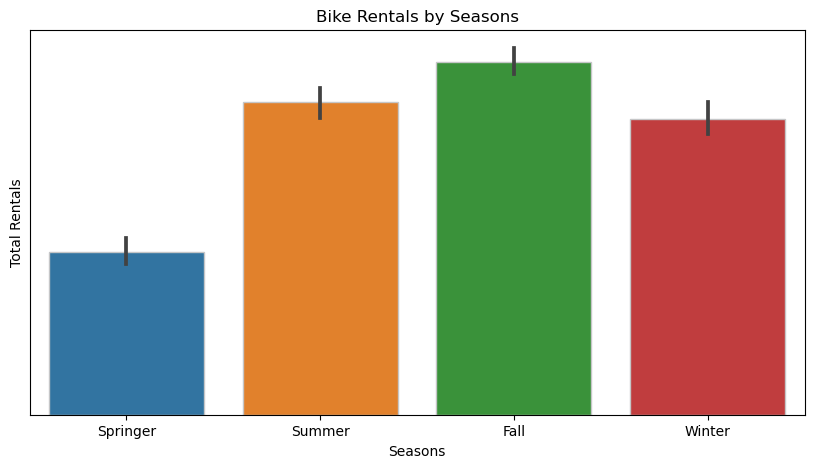

In [188]:
plt.figure(figsize=(10, 5))
sns.barplot(x = categorical_df['season'],
            y = categorical_df['cnt'],
            # fill=True, alpha=1,
            # palette=('#17252a', '#2b7a78','#3aafa9','#def2f1','#feffff'),
            edgecolor="#c5c6c7")
plt.title('Bike Rentals by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Total Rentals')
# plt.set_tick_params(labelsize=14)
plt.tick_params(left=False, labelleft=False)
# plt.bar_label(size="12")

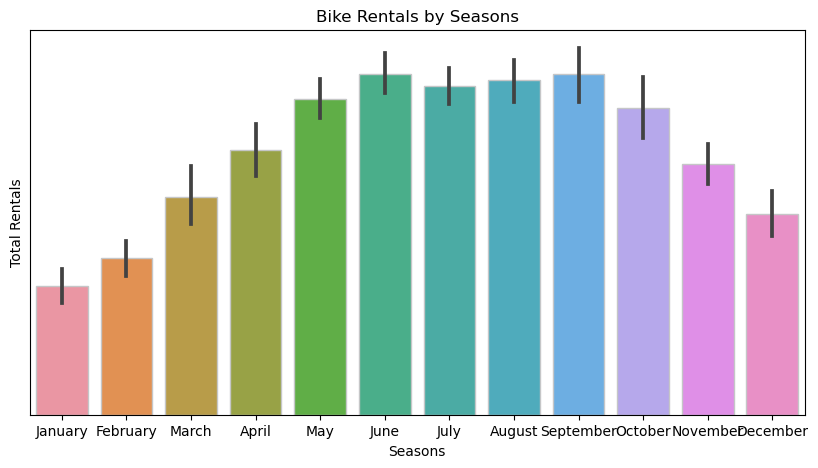

In [189]:
plt.figure(figsize=(10, 5))
sns.barplot(x = categorical_df['mnth'],
            y = categorical_df['cnt'],
            # fill=True, alpha=1,
            # palette=('#17252a', '#2b7a78','#3aafa9','#def2f1','#feffff'),
            edgecolor="#c5c6c7")
plt.title('Bike Rentals by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Total Rentals')
# plt.set_tick_params(labelsize=14)
plt.tick_params(left=False, labelleft=False)
# plt.bar_label(size="12")

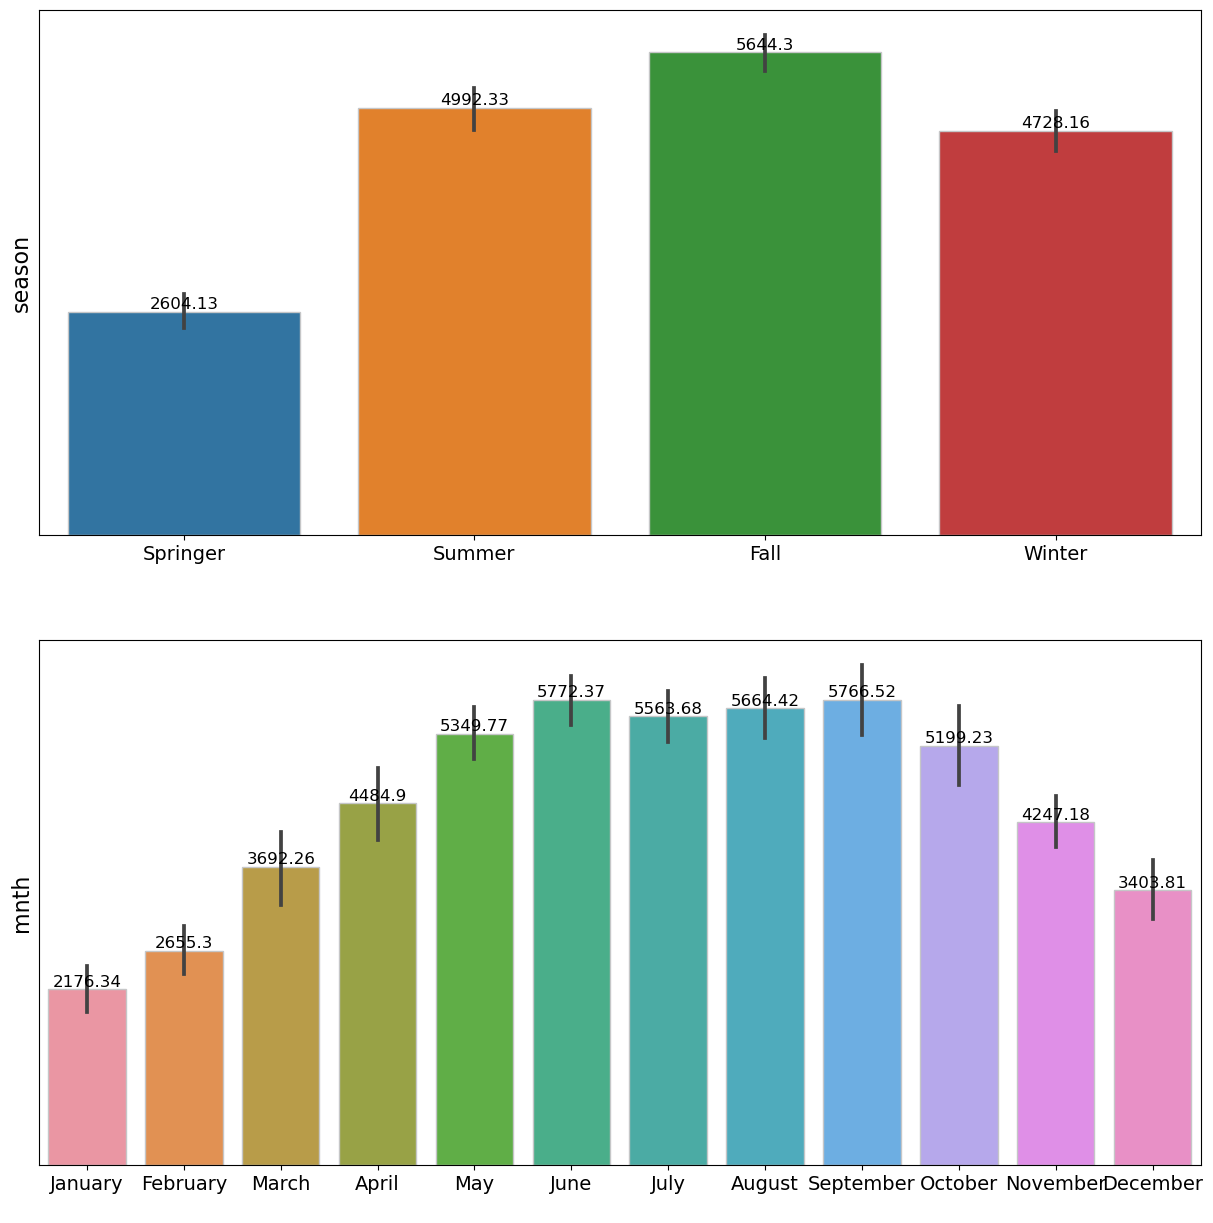

In [190]:
# Columns required for Categrical visualizations

cat_col_vis = ['season','mnth']

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15, 15))
i = 0

for cols in cat_col_vis:
    
    sns.barplot(x = categorical_df[cols],
                y = categorical_df['cnt'],
                # fill=True, alpha=1, 
                ax=ax[i],
                # palette=('#17252a', '#2b7a78','#3aafa9','#def2f1','#feffff'),
                edgecolor="#c5c6c7")
                
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].xaxis.set_tick_params(labelsize=14)
    ax[i].tick_params(left=False, labelleft=False)
    ax[i].set_ylabel(cols, fontsize=16)    
    ax[i].bar_label(ax[i].containers[0], size="12")
    i=i+1
    
plt.show()

In [191]:
monthly_data = numerical_data.groupby("mnth").sum()["cnt"]

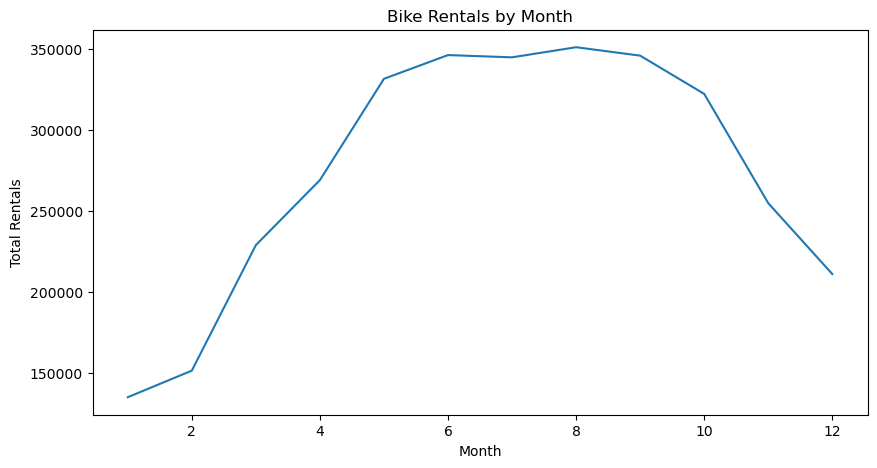

In [192]:
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_data)
plt.title('Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.show()

### Weather Impact

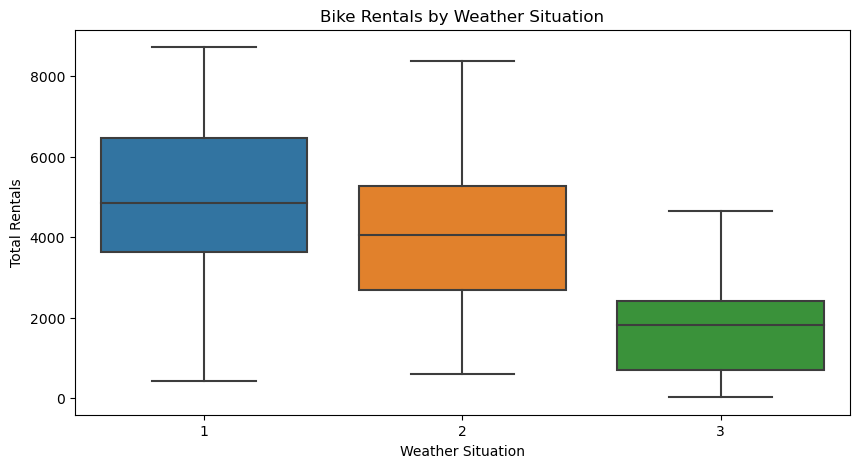

In [193]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="weathersit", y="cnt", data=day_df)
plt.title("Bike Rentals by Weather Situation")
plt.xlabel("Weather Situation")
plt.ylabel("Total Rentals")
plt.show()

### User Behavior

In [194]:
day_df['casual_percentage'] = day_df['casual'] / day_df['cnt']
day_df['registered_percentage'] = day_df['registered'] / day_df['cnt']

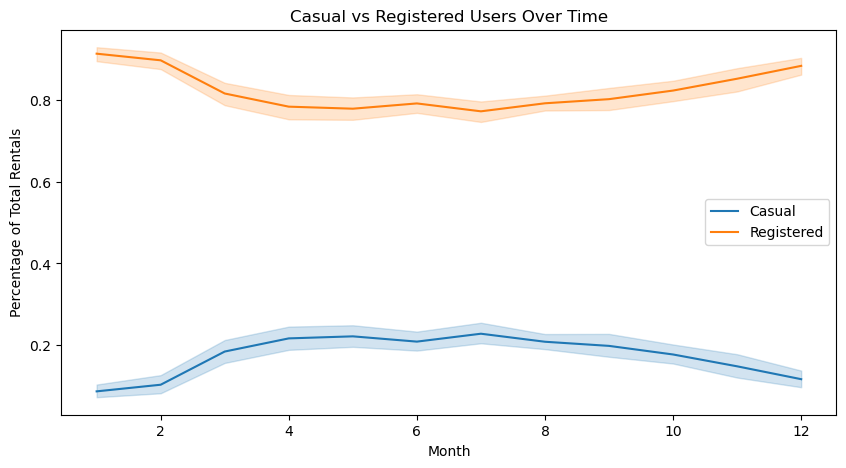

In [195]:
plt.figure(figsize=(10,5))
sns.lineplot(data=day_df, x="mnth", y="casual_percentage", label="Casual")
sns.lineplot(data=day_df, x="mnth", y="registered_percentage", label="Registered")
plt.title("Casual vs Registered Users Over Time")
plt.xlabel("Month")
plt.ylabel("Percentage of Total Rentals")
plt.legend()
plt.show()

### Correlation

In [196]:
from scipy.stats import pearsonr

# Check if 'temp' or 'cnt' is constant
if day_df['temp'].nunique() > 1 and day_df['cnt'].nunique() > 1:
    correlation, _ = pearsonr(day_df['temp'], day_df['cnt'])
    print('Correlation between temperature and total rentals:', correlation)
else:
    print("Either 'temp' or 'cnt' is constant, correlation cannot be calculated.")

Correlation between temperature and total rentals: -0.6184782730999319


## Conclusion

<details>
    <summary>How do bike rentals vary across different seasons and months?</summary>

    These trends suggest that weather and temperature play a significant role in influencing bike rental patterns. Warmer months and seasons tend to see higher demand for bike rentals, while colder periods see a decrease in demand.
</details>

<details>
    <summary>How does weather affect bike rentals?</summary>

    - Clear, Few clouds, Partly cloudy, Partly cloudy (Weather Situation 1): This is the most favorable weather for bike rentals with approximately 7500 rentals. Clear or partly cloudy weather is ideal for outdoor activities like biking.

    - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (Weather Situation 2): This weather situation results in a decrease in bike rentals to approximately 5000. The presence of mist or broken clouds might make biking less appealing.

    - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (Weather Situation 3): This weather situation has the least favorable conditions for biking with approximately 2500 rentals. Inclement weather like rain, snow, or thunderstorms can discourage people from outdoor activities like biking due to safety concerns and discomfort.
</details>

<details>
    <summary>What are the differences between casual and registered users in terms of rental patterns?</summary>

    - Casual Users: 
                
        The percentage of total rentals by casual users is higher than that of registered users for all months. There is a slight dip around the 6th month, after which it increases again. This suggests that casual users might be more influenced by factors such as weather, holidays, or events that occur around this time.

    - Registered Users:
            
        The percentage of total rentals by registered users is lower than that of casual users. There is a slight increase around the 6th month, after which it decreases again. This could indicate that registered users have more consistent usage patterns throughout the year, but there might be certain times (like the 6th month) when their usage increases.
</details>

<details>
    <summary>Is there a correlation between weather conditions and bike rentals?</summary>

    there seems to be a strong correlation between weather conditions and bike rentals, with clear or partly cloudy weather being the most favorable for bike rentals, and adverse weather conditions like light snow or rain being the least favorable.
</details>

<details>
    <summary>How does the time of year affect the behavior of casual versus registered users?</summary>

    It appears that both registered and casual users prefer to rent bikes under clear or partly cloudy weather conditions across all seasons. However, registered users seem to be more tolerant of adverse weather conditions compared to casual users. This information could be valuable for predicting bike rental patterns and informing marketing strategies. For instance, additional promotions could be planned for times when the weather is expected to be clear or partly cloudy, which might boost rentals among casual users. Conversely, strategies could be developed to encourage bike rentals among casual users during adverse weather conditions.
</details>

<details>
    <summary>How can we optimize bike availability according to seasonal trends?</summary>

    - Increase Availability During Peak Seasons:
            
        The data shows that bike rentals peak during the summer and fall seasons. Therefore, it would be beneficial to increase bike availability during these months to meet the high demand.
            
    - Maintenance and Repair During Off-Peak Seasons:
                
        The winter and spring seasons show a lower demand for bike rentals. This would be a good time to schedule regular maintenance and repairs to ensure that the bikes are in optimal condition for the peak season.

    - Promotional Activities:
                
        To encourage bike rentals during off-peak seasons or months with lower demand, promotional activities such as discounts or loyalty programs could be introduced.

    - Alternative Usage:
                
        During colder months when demand is low, consider alternative uses for the bikes. For example, they could be rented out for longer periods or used in partnership with local tour operators for guided tours.

    - Dynamic Pricing:
                
        Implement a dynamic pricing model where prices are lower during off-peak seasons to encourage usage, and higher during peak seasons when demand is high.

    - Weather-Proof Bikes:
                
        Consider investing in weather-proof bikes or providing additional equipment like rain covers or warmer gear during colder months to attract customers.
</details>

<details>
    <summary>Can we predict bike rental demand based on weather conditions?</summary>

    Yes, it is possible to predict bike rental demand based on weather conditions using machine learning models. Weather conditions such as temperature, humidity, wind speed, and weather situation (clear, cloudy, rainy, etc.) can significantly influence the demand for bike rentals.

    Based on the graph you provided, we can see clear trends in bike rentals across different weather situations. For instance, Weather Situation 1 (Clear, Few clouds, Partly cloudy) has the highest number of rentals, followed by Weather Situation 2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds), and then Weather Situation 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds). This suggests that clear or partly cloudy weather is most favorable for bike rentals, while inclement weather like rain or snow reduces the demand.

    These trends can be used to train a machine learning model to predict bike rental demand based on weather conditions. The model could take in weather data as input and output the predicted number of bike rentals. This could be particularly useful for planning and resource allocation in bike rental services.
</details>